## Set torch.device to CUDA

In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


## Download NLTK

In [2]:
import nltk
import os
CUSTOM_DIR = './nltk_data/'

nltk.data.path.append(CUSTOM_DIR)

resources = [
    ('reuters.zip', os.path.join(CUSTOM_DIR, 'corpora', 'reuters')),
    ('punkt.zip', os.path.join(CUSTOM_DIR, 'tokenizers', 'punkt')),
    ('punkt_tab.zip', os.path.join(CUSTOM_DIR, 'tokenizers', 'punkt_tab')),
    ('stopwords.zip', os.path.join(CUSTOM_DIR, 'corpora', 'stopwords')),
]

for resource, path in resources:
    try:
        nltk.data.find(resource)
    except LookupError:
        if not os.path.exists(path):
            nltk.download(resource.split('.')[0], download_dir=CUSTOM_DIR)


[nltk_data] Downloading package reuters to ./nltk_data/...
[nltk_data]   Package reuters is already up-to-date!


In [3]:
from nltk.corpus import reuters

category = "trade"
category_fileids = reuters.fileids(category)
category_docs = [reuters.raw(fileids) for fileids in category_fileids]

print(f"# of documents in category '{category}': {len(category_docs)}")
print(f"1st document:\n{category_docs[0][:500]}")

# of documents in category 'trade': 485
1st document:
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict wo


In [4]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

In [5]:
preprocessed_docs = [preprocess_text(doc) for doc in category_docs]
preprocessed_docs

[['asian',
  'exporters',
  'fear',
  'damage',
  'u.s.-japan',
  'rift',
  'mounting',
  'trade',
  'friction',
  'u.s.',
  'japan',
  'raised',
  'fears',
  'among',
  'many',
  'asia',
  "'s",
  'exporting',
  'nations',
  'row',
  'could',
  'inflict',
  'far-reaching',
  'economic',
  'damage',
  'businessmen',
  'officials',
  'said',
  'told',
  'reuter',
  'correspondents',
  'asian',
  'capitals',
  'u.s.',
  'move',
  'japan',
  'might',
  'boost',
  'protectionist',
  'sentiment',
  'u.s.',
  'lead',
  'curbs',
  'american',
  'imports',
  'products',
  'exporters',
  'said',
  'conflict',
  'would',
  'hurt',
  'long-run',
  'short-term',
  'tokyo',
  "'s",
  'loss',
  'might',
  'gain',
  'u.s.',
  'said',
  'impose',
  '300',
  'mln',
  'dlrs',
  'tariffs',
  'imports',
  'japanese',
  'electronics',
  'goods',
  'april',
  '17',
  'retaliation',
  'japan',
  "'s",
  'alleged',
  'failure',
  'stick',
  'pact',
  'sell',
  'semiconductors',
  'world',
  'markets',
  'cost

In [6]:
len(preprocessed_docs)

485

In [7]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(preprocessed_docs)))
vocab

['answer',
 'payroll',
 'shifted',
 'findings',
 'chocolate',
 '12.43',
 'legislation',
 'reducing',
 'elements',
 'loewy',
 'volumes',
 '112',
 'dupont',
 'number',
 'tied-aid',
 'succesfull',
 'idle',
 '120.4',
 'unprofitable',
 'dawkins',
 'jakarta',
 'usefulness',
 '55.3',
 'continues',
 'lowered',
 'joint',
 'hook',
 '13.7',
 'markedly',
 '18.5',
 'mexico',
 'ecuador',
 'raiders',
 'attainable',
 '25.6',
 'pickup',
 'neglecting',
 'india',
 'shrink',
 'insistence',
 'six-monthly',
 'extra',
 'non-smoothed',
 'maryland',
 'repairing',
 'bucharest',
 'gives',
 'liable',
 'generalised',
 'frankfurt',
 'neck',
 'bitter',
 'dented',
 'oil',
 '2000.',
 'save',
 'communities',
 'inflict',
 'usual',
 'internationalized',
 'minority',
 'telephones',
 'failure',
 'enforce',
 'honda',
 'high-level',
 'leslie',
 'interbank',
 'electronic',
 'satisfying',
 'road',
 'gephardt',
 'primarily',
 'enormous',
 'hogs',
 'bumpei',
 '1973',
 '59-billion-dlr',
 'smit.t',
 'illustrating',
 'ethanol',
 'p

In [8]:
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'answer': 0, 'payroll': 1, 'shifted': 2, 'findings': 3, 'chocolate': 4, '12.43': 5, 'legislation': 6, 'reducing': 7, 'elements': 8, 'loewy': 9, 'volumes': 10, '112': 11, 'dupont': 12, 'number': 13, 'tied-aid': 14, 'succesfull': 15, 'idle': 16, '120.4': 17, 'unprofitable': 18, 'dawkins': 19, 'jakarta': 20, 'usefulness': 21, '55.3': 22, 'continues': 23, 'lowered': 24, 'joint': 25, 'hook': 26, '13.7': 27, 'markedly': 28, '18.5': 29, 'mexico': 30, 'ecuador': 31, 'raiders': 32, 'attainable': 33, '25.6': 34, 'pickup': 35, 'neglecting': 36, 'india': 37, 'shrink': 38, 'insistence': 39, 'six-monthly': 40, 'extra': 41, 'non-smoothed': 42, 'maryland': 43, 'repairing': 44, 'bucharest': 45, 'gives': 46, 'liable': 47, 'generalised': 48, 'frankfurt': 49, 'neck': 50, 'bitter': 51, 'dented': 52, 'oil': 53, '2000.': 54, 'save': 55, 'communities': 56, 'inflict': 57, 'usual': 58, 'internationalized': 59, 'minority': 60, 'telephones': 61, 'failure': 62, 'enforce': 63, 'honda': 64, 'high-level': 65, 'lesli

In [9]:
voc_size = len(vocab)
print(voc_size)

8163


In [10]:
index2word = {v:k for k, v in word2index.items()} 
index2word

{0: 'answer',
 1: 'payroll',
 2: 'shifted',
 3: 'findings',
 4: 'chocolate',
 5: '12.43',
 6: 'legislation',
 7: 'reducing',
 8: 'elements',
 9: 'loewy',
 10: 'volumes',
 11: '112',
 12: 'dupont',
 13: 'number',
 14: 'tied-aid',
 15: 'succesfull',
 16: 'idle',
 17: '120.4',
 18: 'unprofitable',
 19: 'dawkins',
 20: 'jakarta',
 21: 'usefulness',
 22: '55.3',
 23: 'continues',
 24: 'lowered',
 25: 'joint',
 26: 'hook',
 27: '13.7',
 28: 'markedly',
 29: '18.5',
 30: 'mexico',
 31: 'ecuador',
 32: 'raiders',
 33: 'attainable',
 34: '25.6',
 35: 'pickup',
 36: 'neglecting',
 37: 'india',
 38: 'shrink',
 39: 'insistence',
 40: 'six-monthly',
 41: 'extra',
 42: 'non-smoothed',
 43: 'maryland',
 44: 'repairing',
 45: 'bucharest',
 46: 'gives',
 47: 'liable',
 48: 'generalised',
 49: 'frankfurt',
 50: 'neck',
 51: 'bitter',
 52: 'dented',
 53: 'oil',
 54: '2000.',
 55: 'save',
 56: 'communities',
 57: 'inflict',
 58: 'usual',
 59: 'internationalized',
 60: 'minority',
 61: 'telephones',
 62: '

## Co-occurence Matrix X

In [11]:
from collections import Counter

X_i = Counter(flatten(preprocessed_docs)) # X_i
X_i

Counter({'said': 2180,
         'trade': 2026,
         'u.s.': 1321,
         'billion': 1082,
         "'s": 1025,
         '``': 972,
         "''": 960,
         'japan': 786,
         'dlrs': 690,
         'would': 608,
         'year': 579,
         'pct': 526,
         'mln': 504,
         'deficit': 499,
         'surplus': 431,
         'japanese': 425,
         'exports': 417,
         'last': 404,
         'imports': 348,
         'countries': 329,
         'foreign': 319,
         'ec': 308,
         'states': 286,
         'government': 280,
         'february': 267,
         'united': 263,
         'january': 251,
         'officials': 250,
         'also': 249,
         'market': 245,
         'told': 244,
         'economic': 241,
         'agreement': 226,
         'world': 224,
         'tariffs': 222,
         'gatt': 219,
         'new': 216,
         '1986': 212,
         'goods': 210,
         'dollar': 202,
         'two': 197,
         'reagan': 196,
         'm

In [12]:
# adjustable window size
window_size = 2  # it can be any postive integer

# skip grams with adjustable window size
skip_grams = []

# Loop through each word sequence
for sent in preprocessed_docs:
    for i in range(len(sent)):
        target = sent[i]

        # Define the context window boundaries
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(sent))

        # Collect all words in the window except the target
        context = [sent[j] for j in range(start, end) if j != i]

        # Generate skip-grams
        for w in context:
            skip_grams.append((target, w))

skip_grams

[('asian', 'exporters'),
 ('asian', 'fear'),
 ('exporters', 'asian'),
 ('exporters', 'fear'),
 ('exporters', 'damage'),
 ('fear', 'asian'),
 ('fear', 'exporters'),
 ('fear', 'damage'),
 ('fear', 'u.s.-japan'),
 ('damage', 'exporters'),
 ('damage', 'fear'),
 ('damage', 'u.s.-japan'),
 ('damage', 'rift'),
 ('u.s.-japan', 'fear'),
 ('u.s.-japan', 'damage'),
 ('u.s.-japan', 'rift'),
 ('u.s.-japan', 'mounting'),
 ('rift', 'damage'),
 ('rift', 'u.s.-japan'),
 ('rift', 'mounting'),
 ('rift', 'trade'),
 ('mounting', 'u.s.-japan'),
 ('mounting', 'rift'),
 ('mounting', 'trade'),
 ('mounting', 'friction'),
 ('trade', 'rift'),
 ('trade', 'mounting'),
 ('trade', 'friction'),
 ('trade', 'u.s.'),
 ('friction', 'mounting'),
 ('friction', 'trade'),
 ('friction', 'u.s.'),
 ('friction', 'japan'),
 ('u.s.', 'trade'),
 ('u.s.', 'friction'),
 ('u.s.', 'japan'),
 ('u.s.', 'raised'),
 ('japan', 'friction'),
 ('japan', 'u.s.'),
 ('japan', 'raised'),
 ('japan', 'fears'),
 ('raised', 'u.s.'),
 ('raised', 'japan'

In [13]:
X_ik_skipgram = Counter(skip_grams) # Co-occurece in given windows size
X_ik_skipgram

Counter({('billion', 'dlrs'): 513,
         ('dlrs', 'billion'): 513,
         ("''", 'said'): 452,
         ('said', "''"): 452,
         ('trade', 'u.s.'): 274,
         ('u.s.', 'trade'): 274,
         ('said', '``'): 262,
         ('``', 'said'): 262,
         ('united', 'states'): 258,
         ('states', 'united'): 258,
         ('mln', 'dlrs'): 252,
         ('dlrs', 'mln'): 252,
         ('trade', 'deficit'): 241,
         ('deficit', 'trade'): 241,
         ('last', 'year'): 218,
         ('year', 'last'): 218,
         ('trade', 'surplus'): 211,
         ('surplus', 'trade'): 211,
         ('said', 'said'): 184,
         ('officials', 'said'): 152,
         ('said', 'officials'): 152,
         ('japan', "'s"): 151,
         ("'s", 'japan'): 151,
         ('said', 'trade'): 149,
         ('trade', 'said'): 149,
         ('u.s.', 'said'): 142,
         ('said', 'u.s.'): 142,
         ("'s", 'trade'): 140,
         ('trade', "'s"): 140,
         ("''", '``'): 126,
         ('``'

### Weighting function

In [14]:
# # simply a normalized function...don't worry too much
# def weighting(w_i, w_j, X_ik):
        
#     #check whether the co-occurrences exist between these two words
#     try:
#         x_ij = X_ik[(w_i, w_j)]
#     except:
#         x_ij = 1  #if does not exist, set it to 1
                
#     x_max = 100 #100 # fixed in paper  #cannot exceed 100 counts
#     alpha = 0.75
    
#     #if co-occurrence does not exceed 100, scale it based on some alpha
#     if x_ij < x_max:
#         result = (x_ij/x_max)**alpha  #scale it
#     else:
#         result = 1  #if is greater than max, set it to 1 maximum
    
#     return result


def weighting(x_ij, x_max=100, alpha=0.75):
    return (x_ij / x_max) ** alpha if x_ij < x_max else 1

In [15]:
type(vocab)

list

In [16]:
from itertools import combinations_with_replacement
from collections import defaultdict
from scipy.sparse import dok_matrix

# X_ik = {}  #for keeping the co-occurences
# weighting_dic = {} #scaling the percentage of sampling

# for bigram in combinations_with_replacement(vocab, 2):
#     if X_ik_skipgram.get(bigram) is not None:  #matches 
#         co_occer = X_ik_skipgram[bigram]  #get the count from what we already counted
#         X_ik[bigram] = co_occer + 1 # + 1 for stability issue
#         X_ik[(bigram[1],bigram[0])] = co_occer+1   #count also for the opposite
#     else:
#         pass
        
#     weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
#     weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)

# print(f"{X_ik=}")
# print(f"{weighting_dic=}")


# create dictionaries for co-occurrences and weights
vocab_index = {word: idx for idx, word in enumerate(vocab)}
vocab_size = len(vocab)

X_ik_sparse = dok_matrix((vocab_size, vocab_size), dtype=int)

# get skip-grams and update co-occurrence matrix
for sent in preprocessed_docs:
    for i in range(1, len(sent) - 1):
        target = sent[i]
        context = [sent[i - 1], sent[i + 1]]
        for w in context:
            if target in vocab_index and w in vocab_index:
                X_ik_sparse[vocab_index[target], vocab_index[w]] += 1

# compute weights and store in a sparse matrix
weighting_sparse = dok_matrix((vocab_size, vocab_size), dtype=float)

for (i, j), x_ij in X_ik_sparse.items():
    weight = weighting(x_ij)
    weighting_sparse[i, j] = weight
    weighting_sparse[j, i] = weight  # Mirror weights

# convert sparse matrices to reformat dictionaries for output
X_ik = {
    (vocab[i], vocab[j]): float(count)
    for (i, j), count in X_ik_sparse.items()
}
weighting_dic = {
    (vocab[i], vocab[j]): float(weight)
    for (i, j), weight in weighting_sparse.items()
}

In [17]:
X_ik

{('exporters', 'asian'): 1.0,
 ('exporters', 'fear'): 2.0,
 ('fear', 'exporters'): 2.0,
 ('fear', 'damage'): 1.0,
 ('damage', 'fear'): 1.0,
 ('damage', 'u.s.-japan'): 1.0,
 ('u.s.-japan', 'damage'): 1.0,
 ('u.s.-japan', 'rift'): 1.0,
 ('rift', 'u.s.-japan'): 1.0,
 ('rift', 'mounting'): 1.0,
 ('mounting', 'rift'): 1.0,
 ('mounting', 'trade'): 2.0,
 ('trade', 'mounting'): 2.0,
 ('trade', 'friction'): 17.0,
 ('friction', 'trade'): 18.0,
 ('friction', 'u.s.'): 1.0,
 ('u.s.', 'friction'): 1.0,
 ('u.s.', 'japan'): 40.0,
 ('japan', 'u.s.'): 39.0,
 ('japan', 'raised'): 1.0,
 ('raised', 'japan'): 1.0,
 ('raised', 'fears'): 1.0,
 ('fears', 'raised'): 1.0,
 ('fears', 'among'): 1.0,
 ('among', 'fears'): 1.0,
 ('among', 'many'): 2.0,
 ('many', 'among'): 2.0,
 ('many', 'asia'): 1.0,
 ('asia', 'many'): 1.0,
 ('asia', "'s"): 2.0,
 ("'s", 'asia'): 2.0,
 ("'s", 'exporting'): 1.0,
 ('exporting', "'s"): 1.0,
 ('exporting', 'nations'): 2.0,
 ('nations', 'exporting'): 2.0,
 ('nations', 'row'): 1.0,
 ('row',

In [18]:
weighting_dic

{('exporters', 'asian'): 0.03162277660168379,
 ('asian', 'exporters'): 0.03162277660168379,
 ('exporters', 'fear'): 0.053182958969449884,
 ('fear', 'exporters'): 0.053182958969449884,
 ('fear', 'damage'): 0.03162277660168379,
 ('damage', 'fear'): 0.03162277660168379,
 ('damage', 'u.s.-japan'): 0.03162277660168379,
 ('u.s.-japan', 'damage'): 0.03162277660168379,
 ('u.s.-japan', 'rift'): 0.03162277660168379,
 ('rift', 'u.s.-japan'): 0.03162277660168379,
 ('rift', 'mounting'): 0.03162277660168379,
 ('mounting', 'rift'): 0.03162277660168379,
 ('mounting', 'trade'): 0.053182958969449884,
 ('trade', 'mounting'): 0.053182958969449884,
 ('trade', 'friction'): 0.2763467610958144,
 ('friction', 'trade'): 0.2763467610958144,
 ('friction', 'u.s.'): 0.03162277660168379,
 ('u.s.', 'friction'): 0.03162277660168379,
 ('u.s.', 'japan'): 0.4935128386754873,
 ('japan', 'u.s.'): 0.4935128386754873,
 ('japan', 'raised'): 0.03162277660168379,
 ('raised', 'japan'): 0.03162277660168379,
 ('raised', 'fears'): 

## Prepare train data

In [19]:
total_count = 0
for count, value in enumerate(preprocessed_docs):
    total_count += count
    print(value)

print(total_count)

['asian', 'exporters', 'fear', 'damage', 'u.s.-japan', 'rift', 'mounting', 'trade', 'friction', 'u.s.', 'japan', 'raised', 'fears', 'among', 'many', 'asia', "'s", 'exporting', 'nations', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', 'businessmen', 'officials', 'said', 'told', 'reuter', 'correspondents', 'asian', 'capitals', 'u.s.', 'move', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'u.s.', 'lead', 'curbs', 'american', 'imports', 'products', 'exporters', 'said', 'conflict', 'would', 'hurt', 'long-run', 'short-term', 'tokyo', "'s", 'loss', 'might', 'gain', 'u.s.', 'said', 'impose', '300', 'mln', 'dlrs', 'tariffs', 'imports', 'japanese', 'electronics', 'goods', 'april', '17', 'retaliation', 'japan', "'s", 'alleged', 'failure', 'stick', 'pact', 'sell', 'semiconductors', 'world', 'markets', 'cost', 'unofficial', 'japanese', 'estimates', 'put', 'impact', 'tariffs', '10', 'billion', 'dlrs', 'spokesmen', 'major', 'electronics', 'firms', 'said', 'would', 'virtua

In [20]:
import math
import numpy as np

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic):
    
    #convert to id since our skip_grams is word, not yet id
    skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in skip_grams]
    
    random_inputs = []
    random_labels = []
    random_coocs  = []
    random_weightings = []
    random_index = np.random.choice(range(len(skip_grams_id)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams_id[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams_id[i][1]])  # context word, e.g., 3
        
        #get cooc
        pair = skip_grams[i]
        # try:
        #     cooc = X_ik[pair]
        # except:
        #     cooc = 1

        cooc = X_ik.get(pair, 1)
        random_coocs.append([math.log(cooc)])
        
        #get weighting
        weighting = weighting_dic.get(pair, 1)
        random_weightings.append([weighting])
                    
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weightings)



### Testing the method

In [21]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, preprocessed_docs, skip_grams, X_ik, weighting_dic)

In [22]:
input_batch, target_batch, cooc_batch, weighting_batch

(array([[3234],
        [4172]]),
 array([[5148],
        [6973]]),
 array([[0.        ],
        [1.09861229]]),
 array([[1.        ],
        [0.07208434]]))

## Model

### Skipgram

In [23]:
from torch import nn

class GloVe(nn.Module):
    
    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding
        
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, window_size, emb_size]
        
        center_bias = self.v_bias(center_words).squeeze(1) 
        target_bias = self.u_bias(target_words).squeeze(1)
        
        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        
        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2) # [batch_size, window_size]
        
        return torch.sum(loss) # scalar

# Training

In [24]:
from torch import optim

batch_size     = 512 # mini-batch size
embedding_size = 2 #so we can later plot
model          = GloVe(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
# def epoch_time(start_time, end_time):
#     elapsed_time = end_time - start_time
#     elapsed_mins = int(elapsed_time / 60)
#     elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
#     return elapsed_mins, elapsed_secs

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time % 60)
    elapsed_millis = int((elapsed_time - int(elapsed_time)) * 1000)  # get milliseconds
    return elapsed_mins, elapsed_secs, elapsed_millis

In [26]:
model = model.to(device=device)

In [27]:
import time

total_training_time = 0

# Training
num_epochs = 2000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, preprocessed_docs , skip_grams, X_ik, weighting_dic)
    input_batch  = torch.LongTensor(input_batch).to(device=device)         #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch).to(device=device)        #[batch_size, 1]

    cooc_batch   = torch.FloatTensor(cooc_batch).to(device=device)         #[batch_size, 1]
    weighting_batch = torch.FloatTensor(weighting_batch).to(device=device) #[batch_size, 1]
    
    optimizer.zero_grad()
    loss = model(input_batch, target_batch, cooc_batch, weighting_batch)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs, epoch_millis = epoch_time(start, end)
    total_training_time += (end - start)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s {epoch_millis}ms")

total_mins, total_secs, total_millis = epoch_time(0, total_training_time)
print(f"Total training time: {total_mins}m {total_secs}s {total_millis}ms")

Epoch: 100 | cost: 1187.727295 | time: 0m 0s 93ms
Epoch: 200 | cost: 1347.065918 | time: 0m 0s 88ms
Epoch: 300 | cost: 1004.830078 | time: 0m 0s 90ms
Epoch: 400 | cost: 897.430054 | time: 0m 0s 90ms
Epoch: 500 | cost: 925.007385 | time: 0m 0s 89ms
Epoch: 600 | cost: 950.286133 | time: 0m 0s 101ms
Epoch: 700 | cost: 873.098999 | time: 0m 0s 88ms
Epoch: 800 | cost: 831.100586 | time: 0m 0s 90ms
Epoch: 900 | cost: 915.156372 | time: 0m 0s 89ms
Epoch: 1000 | cost: 825.886841 | time: 0m 0s 90ms
Epoch: 1100 | cost: 739.514038 | time: 0m 0s 92ms
Epoch: 1200 | cost: 683.862122 | time: 0m 0s 90ms
Epoch: 1300 | cost: 812.014038 | time: 0m 0s 88ms
Epoch: 1400 | cost: 684.134399 | time: 0m 0s 89ms
Epoch: 1500 | cost: 640.412415 | time: 0m 0s 89ms
Epoch: 1600 | cost: 678.341919 | time: 0m 0s 92ms
Epoch: 1700 | cost: 578.504272 | time: 0m 0s 88ms
Epoch: 1800 | cost: 594.141846 | time: 0m 0s 89ms
Epoch: 1900 | cost: 504.528320 | time: 0m 0s 89ms
Epoch: 2000 | cost: 612.547668 | time: 0m 0s 90ms
Total

## Plotting the embeddings

In [28]:
vocab[:10]

['answer',
 'payroll',
 'shifted',
 'findings',
 'chocolate',
 '12.43',
 'legislation',
 'reducing',
 'elements',
 'loewy']

In [29]:
word = vocab[0]

In [30]:
id = word2index[word]
id

0

In [31]:
id_tensor = torch.LongTensor([id]).to(device=device)
id_tensor

tensor([0], device='cuda:0')

In [32]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[1.4868, 0.1760]], device='cuda:0', grad_fn=<EmbeddingBackward0>),
 tensor([[-0.5584, -0.3500]], device='cuda:0', grad_fn=<EmbeddingBackward0>))

In [33]:
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-0.0870, device='cuda:0', grad_fn=<SelectBackward0>)

In [34]:
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]]).to(device=device)
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

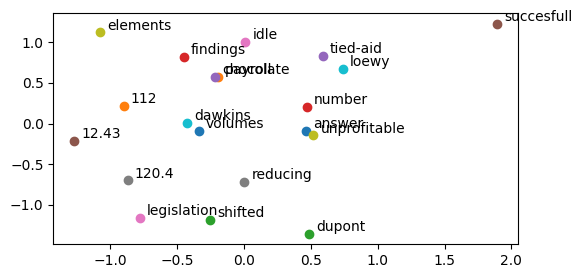

In [35]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): # loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [36]:
# save the model to be used in web application
torch.save(model.state_dict(), "models/glove_scratch.pth")

## Cosine similarity

In [37]:
tax = get_embed('tax')
money = get_embed('money')
billion = get_embed('billion')
million = get_embed('million')

canada = get_embed('canada')
thai = get_embed('thai')
japan = get_embed('japan')

In [38]:
from numpy import dot
from numpy.linalg import norm


def cos_sim(a, b):
    cos_sim = dot(a, b) / (norm(a) * norm(b))
    return cos_sim

print(f'tax vs money: {cos_sim(tax, money)}')
print(f'tax vs billion: {cos_sim(tax, billion)}')
print(f'tax vs million: {cos_sim(tax, million)}')
print(f'money vs billion: {cos_sim(money, billion)}')
print(f'money vs million: {cos_sim(money, million)}')
print(f'billion vs million: {cos_sim(billion, million)}')

print(f'canada vs thai: {cos_sim(canada, thai)}')
print(f'canada vs japan: {cos_sim(canada, japan)}')
print(f'thai vs japan: {cos_sim(thai, japan)}')


tax vs money: -0.0993123733662863
tax vs billion: 0.9936488043482912
tax vs million: -0.30312745903025345
money vs billion: 0.013287876790074052
money vs million: 0.9783432358248506
billion vs million: -0.19397078236883322
canada vs thai: 0.44244032449245524
canada vs japan: 0.2537793899933187
thai vs japan: -0.7551564543494121


In [39]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim


print(f'tax vs money: {cos_sim(tax, money)}')
print(f'tax vs billion: {cos_sim(tax, billion)}')
print(f'tax vs million: {cos_sim(tax, million)}')
print(f'money vs billion: {cos_sim(money, billion)}')
print(f'money vs million: {cos_sim(money, million)}')
print(f'billion vs million: {cos_sim(billion, million)}')

print(f'canada vs thai: {cos_sim(canada, thai)}')
print(f'canada vs japan: {cos_sim(canada, japan)}')
print(f'thai vs japan: {cos_sim(thai, japan)}')

tax vs money: -0.0993123733662864
tax vs billion: 0.9936488043482912
tax vs million: -0.3031274590302535
money vs billion: 0.013287876790074038
money vs million: 0.9783432358248507
billion vs million: -0.19397078236883325
canada vs thai: 0.4424403244924553
canada vs japan: 0.2537793899933187
thai vs japan: -0.7551564543494123
